<a href="https://colab.research.google.com/github/Ronitbera/social_sentiment/blob/main/Social_Media_Sentiment_Analysis_for_Brand_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/social_sentiment_dataset.csv")
df.head()

,id,created_at,user,platform,product,text,likes,shares
0,1,2025-09-25 09:41:00,user_9967,Twitter,GammaEarbuds,really impressed with GammaEarbuds — amazing p...,7,9
1,2,2025-06-21 06:24:00,user_3139,Instagram,BetaWatch,@support fantastic build quality for GammaEarb...,19,2
2,3,2025-06-05 13:16:00,user_8951,Instagram,GammaEarbuds,great value for GammaEarbuds — poor warranty! ...,2,0
3,4,2025-10-13 23:53:00,user_6631,Twitter,GammaEarbuds,so happy with BetaWatch — okay setup! #support 📦,0,6
4,5,2025-07-21 01:37:00,user_1793,Twitter,DeltaTablet,superb customer service about AlphaPhone — slo...,13,3


In [2]:
import os
import pandas as pd

# 1) Show current working directory and files in it
print("Current working directory:", os.getcwd())
print("\nFiles in cwd:")
for f in os.listdir(".")[:50]:
    print(" ", f)

# 2) If your file is at the path I created, use the explicit path:
path = "/mnt/data/social_sentiment_project/social_sentiment_dataset.csv"
print("\nChecking existence of expected file:", path)
print("Exists:", os.path.exists(path))

# 3) Try to read the file with a few fallbacks
def try_read(p):
    print("\nTrying read with default settings...")
    try:
        df = pd.read_csv(p, parse_dates=["created_at"])
        print("Success — shape:", df.shape)
        display(df.head())
        return df
    except Exception as e:
        print("Default read failed:", repr(e))

    print("\nTrying read with explicit encoding='utf-8'...")
    try:
        df = pd.read_csv(p, encoding="utf-8", parse_dates=["created_at"], low_memory=False)
        print("Success (utf-8) — shape:", df.shape)
        display(df.head())
        return df
    except Exception as e:
        print("utf-8 failed:", repr(e))

    print("\nTrying read with encoding='latin1'...")
    try:
        df = pd.read_csv(p, encoding="latin1", parse_dates=["created_at"], low_memory=False)
        print("Success (latin1) — shape:", df.shape)
        display(df.head())
        return df
    except Exception as e:
        print("latin1 failed:", repr(e))

    print("\nTrying read with engine='python' and on_bad_lines='skip'...")
    try:
        df = pd.read_csv(p, engine="python", on_bad_lines="skip", parse_dates=["created_at"])
        print("Success (engine=python, skipped bad lines) — shape:", df.shape)
        display(df.head())
        return df
    except Exception as e:
        print("engine=python failed:", repr(e))

    print("\nAll attempts failed. Please copy the exact error message above and share it.")
    return None

df = try_read(path)


Current working directory: /content

Files in cwd:
  .config
  social_sentiment_dataset.csv
  sample_data

Checking existence of expected file: /mnt/data/social_sentiment_project/social_sentiment_dataset.csv
Exists: False

Trying read with default settings...
Default read failed: FileNotFoundError(2, 'No such file or directory')

Trying read with explicit encoding='utf-8'...
utf-8 failed: FileNotFoundError(2, 'No such file or directory')

Trying read with encoding='latin1'...
latin1 failed: FileNotFoundError(2, 'No such file or directory')

Trying read with engine='python' and on_bad_lines='skip'...
engine=python failed: FileNotFoundError(2, 'No such file or directory')

All attempts failed. Please copy the exact error message above and share it.


In [3]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.0 MB/s eta 0:00:00


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df["vader_score"] = df["clean_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

df["sentiment"] = pd.cut(
    df["vader_score"],
    bins=[-1.1, -0.05, 0.05, 1.1],
    labels=["negative", "neutral", "positive"]
)

df.head()


,id,created_at,user,platform,product,text,likes,shares,clean_text,vader_score,sentiment
0,1,2025-09-25 09:41:00,user_9967,Twitter,GammaEarbuds,really impressed with GammaEarbuds — amazing p...,7,9,really impressed with GammaEarbuds amazing pa...,0.8016,positive
1,2,2025-06-21 06:24:00,user_3139,Instagram,BetaWatch,@support fantastic build quality for GammaEarb...,19,2,fantastic build quality for GammaEarbuds amaz...,0.8126,positive
2,3,2025-06-05 13:16:00,user_8951,Instagram,GammaEarbuds,great value for GammaEarbuds — poor warranty! ...,2,0,great value for GammaEarbuds poor warranty,0.5267,positive
3,4,2025-10-13 23:53:00,user_6631,Twitter,GammaEarbuds,so happy with BetaWatch — okay setup! #support 📦,0,6,so happy with BetaWatch okay setup,0.7089,positive
4,5,2025-07-21 01:37:00,user_1793,Twitter,DeltaTablet,superb customer service about AlphaPhone — slo...,13,3,superb customer service about AlphaPhone slow...,0.6249,positive


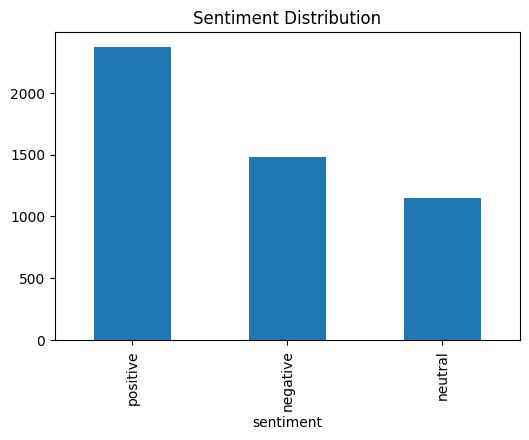

In [7]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Sentiment Distribution")
plt.show()


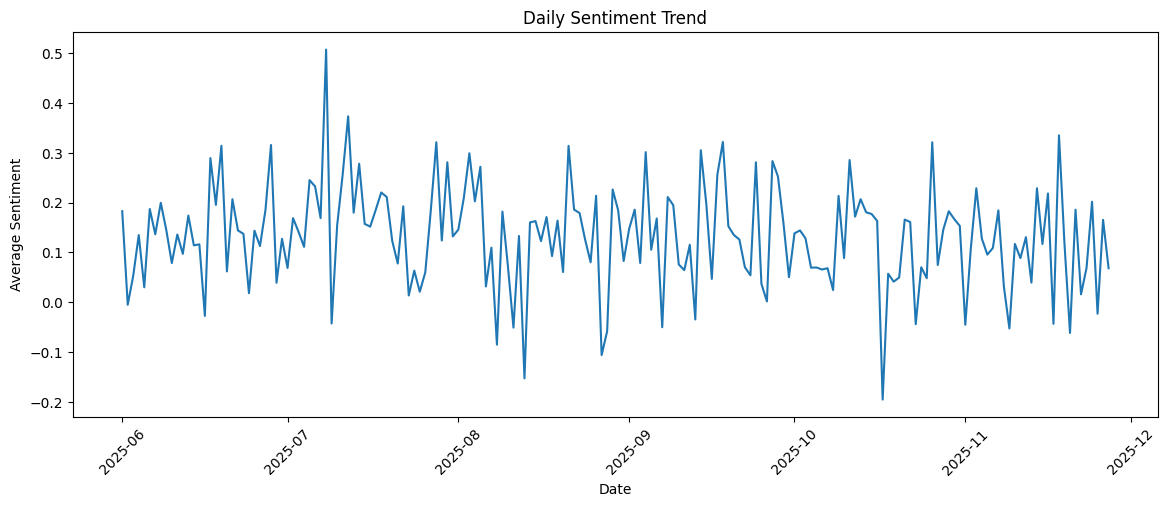

In [8]:
df["date"] = pd.to_datetime(df["created_at"]).dt.date
daily = df.groupby("date")["vader_score"].mean()

plt.figure(figsize=(14,5))
plt.plot(daily.index, daily.values)
plt.title("Daily Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.show()


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=30, ngram_range=(1,2))
X = vectorizer.fit_transform(df["clean_text"])

keywords = vectorizer.get_feature_names_out()
print(keywords)


['about' 'alphaphone' 'alphaphone because' 'app' 'battery' 'because'
 'because of' 'betawatch' 'betawatch because' 'build' 'build quality'
 'delivery' 'deltatablet' 'deltatablet because' 'excellent' 'experience'
 'fast' 'for' 'for specs' 'gammaearbuds' 'gammaearbuds because' 'of'
 'poor' 'quality' 'quality for' 'slow' 'specs' 'the' 'warranty' 'with']


In [12]:
from gensim import corpora, models

texts = [t.split() for t in df["clean_text"].tolist()]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=6)

topics = lda_model.print_topics()
for topic in topics:
    print(topic)


(0, '0.126*"experience" + 0.112*"of" + 0.112*"because" + 0.038*"battery" + 0.037*"poor" + 0.031*"excellent" + 0.030*"AlphaPhone" + 0.027*"with" + 0.027*"DeltaTablet" + 0.027*"not"')
(1, '0.081*"with" + 0.048*"AlphaPhone" + 0.048*"DeltaTablet" + 0.045*"great" + 0.045*"value" + 0.045*"so" + 0.045*"happy" + 0.045*"for" + 0.043*"recommend" + 0.043*"highly"')
(2, '0.201*"for" + 0.171*"specs" + 0.157*"the" + 0.049*"BetaWatch" + 0.049*"buy" + 0.049*"do" + 0.044*"AlphaPhone" + 0.043*"DeltaTablet" + 0.038*"GammaEarbuds" + 0.019*"ordered"')
(3, '0.130*"delivery" + 0.075*"for" + 0.074*"purchase" + 0.073*"fast" + 0.057*"because" + 0.057*"of" + 0.057*"experience" + 0.055*"slow" + 0.041*"best" + 0.040*"DeltaTablet"')
(4, '0.077*"about" + 0.077*"service" + 0.077*"customer" + 0.043*"superb" + 0.042*"quality" + 0.042*"build" + 0.041*"fantastic" + 0.040*"for" + 0.039*"new" + 0.039*"love"')


In [4]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 80.6 MB/s eta 0:00:00


In [13]:
df.to_csv("sentiment_output.csv", index=False)


DataFrame 'df' reloaded from 'sentiment_output.csv'.


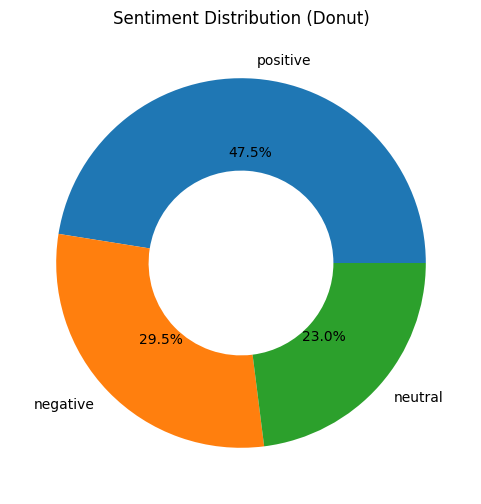

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' not in globals():
    try:
        df = pd.read_csv("/content/sentiment_output.csv")
        print("DataFrame 'df' reloaded from 'sentiment_output.csv'.")
    except FileNotFoundError:
        print("Error: 'sentiment_output.csv' not found. Please ensure previous steps to save the dataframe were executed.")
        raise

df.head()
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', wedgeprops={'width':0.5})
plt.title('Sentiment Distribution (Donut)')
plt.show()

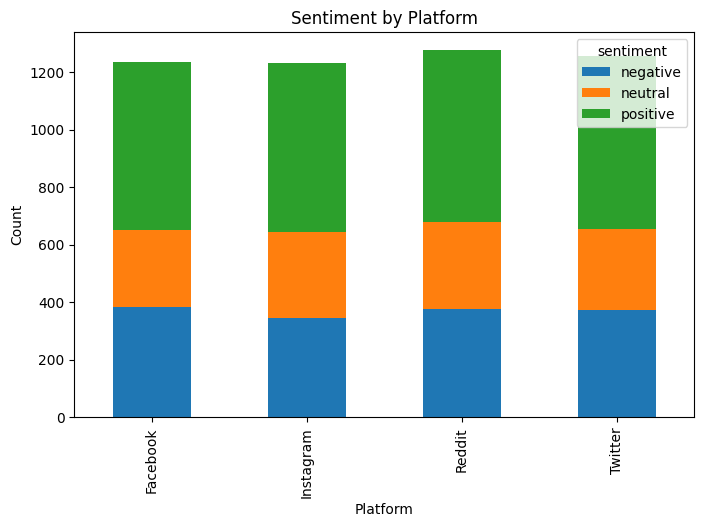

In [6]:
platform_sentiment = df.groupby(['platform', 'sentiment']).size().unstack()

platform_sentiment.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Sentiment by Platform")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.show()


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['clean_text']) # Changed 'tweet_text' to 'clean_text'

keywords = tfidf.get_feature_names_out()
scores = tfidf_matrix.sum(axis=0).A1

keyword_df = pd.DataFrame({'keyword': keywords, 'score': scores})
keyword_df = keyword_df.sort_values(by="score", ascending=False)

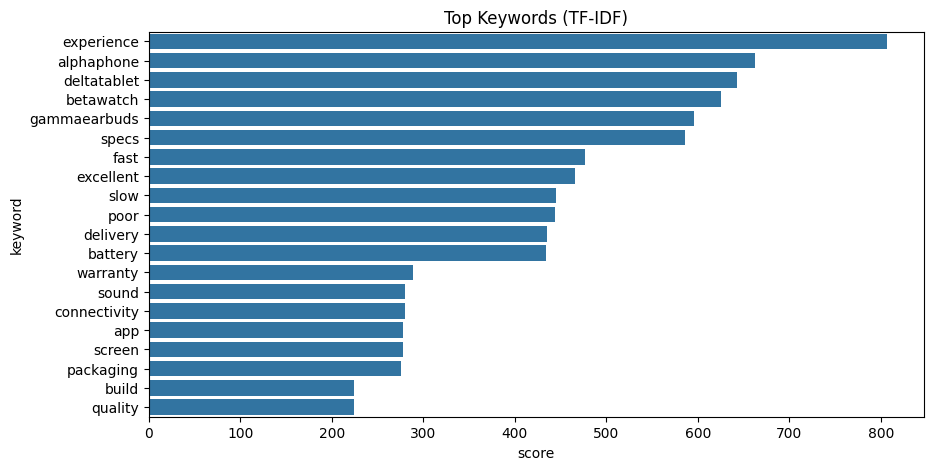

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=keyword_df, x='score', y='keyword')
plt.title("Top Keywords (TF-IDF)")
plt.show()


In [12]:
df['date'] = pd.to_datetime(df['created_at']).dt.date

In [14]:
daily = df.groupby('date')['vader_score'].mean()

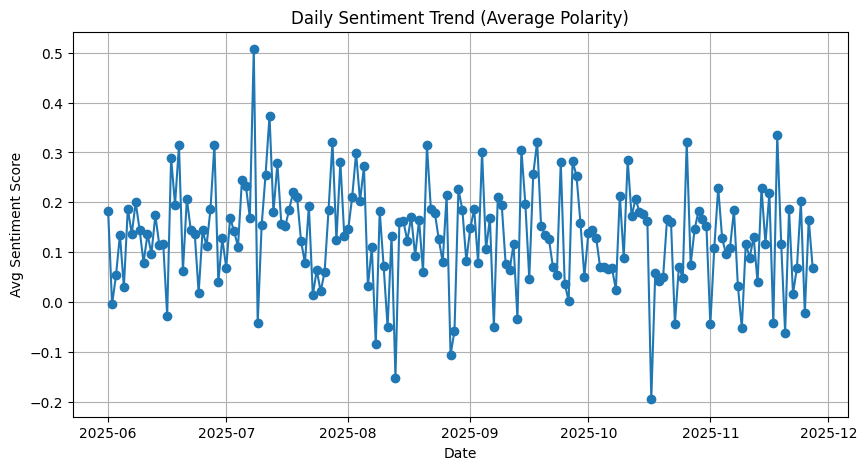

In [15]:
plt.figure(figsize=(10,5))
daily.plot(kind='line', marker='o')
plt.title("Daily Sentiment Trend (Average Polarity)")
plt.xlabel("Date")
plt.ylabel("Avg Sentiment Score")
plt.grid(True)
plt.show()